In [1]:
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.model.Series import Series
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
mask = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\11009101406003_apr 14_2010_Coronal.csv', [144, 144, 255])

1
shape_matrice a remplir (144, 255, 144)
shape après coronal to axial (144, 144, 255)
shape_ 3D array après get mask (144, 144, 255)
(144, 144, 255, 1)
coronal


In [ ]:
mask.details_rois

In [ ]:
print(mask.mask_array.shape)

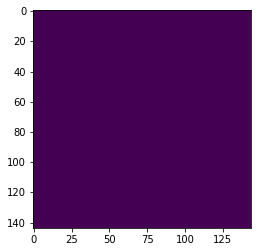

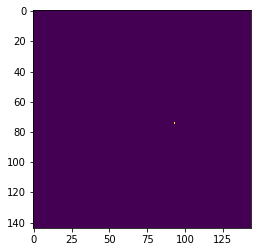

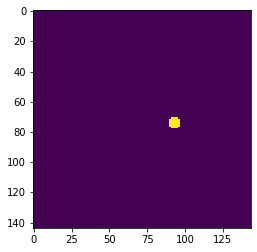

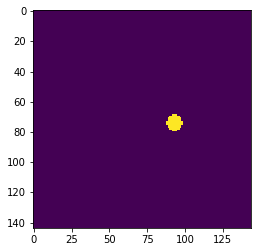

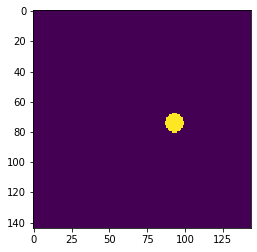

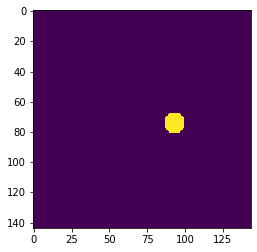

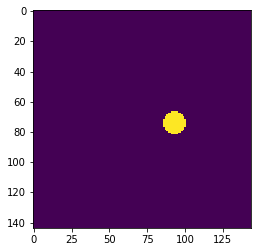

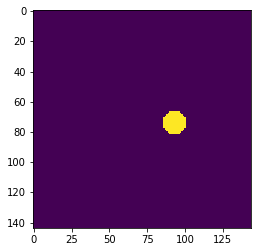

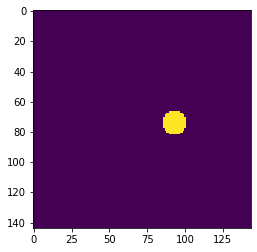

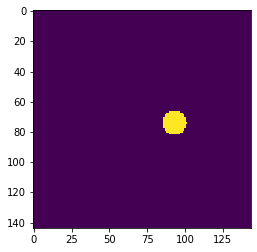

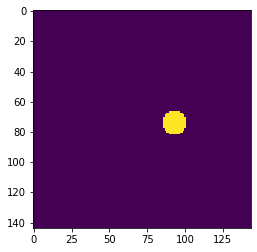

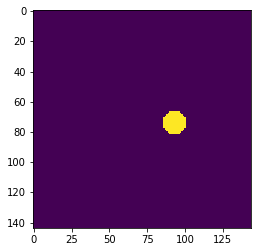

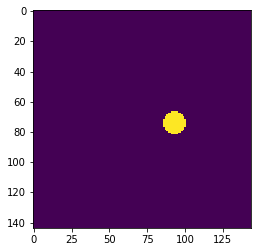

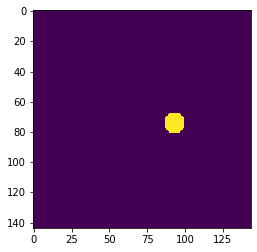

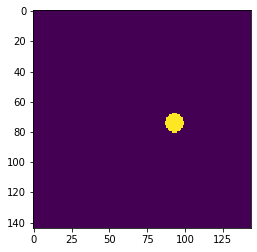

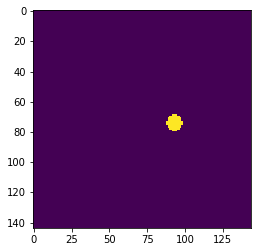

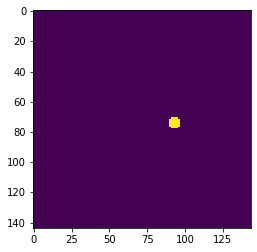

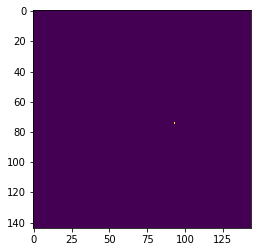

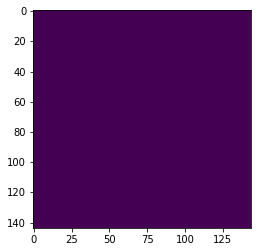

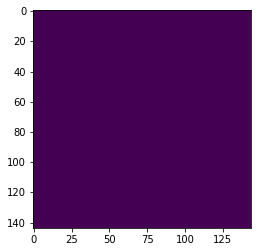

In [3]:
for i in range(85, 105) : 
    
    plt.imshow(mask.mask_array[:,:,i,0])
    plt.show()

In [ ]:
PT_path = r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\1.3.46.670589.28.2.12.4.9177.6631.2.448.0.1271249841'

In [ ]:
serie = SeriesPT(PT_path)


In [ ]:
serie.calculateSULFactor()

In [ ]:
nifti_array = serie.get_numpy_array()


In [ ]:
mask.calcul_suv(nifti_array)

In [ ]:
mask.is_correct_suv(nifti_array)